# A Firm's Labour Portfolio Decission (Julia)

## Preparation Commands

### Load Libraries:

In [1]:
Disp=true;                # Display Graphs and other visual aids

import LabourDP

Disp && import DisplayDP
Disp && using PyCall
Disp && using Color

Disp && @pyimport IPython.display as IpDisp

### Create Colours:

* [Colour Display](Display/My Colour.ipynb)

In [2]:
if Disp
    Colour=DisplayDP.MyColour("EUI")
end

## Model

Firm Maximizes:  
$$V(D,L) = \max_{L^A}\quad \min(D,\sum_i^G F_i L_i^A) - \sum_i^G W_i L_i^A - (\sum_{i=2}^{G-1} \phi_i W_i (L_{i-1}-L_i^A) + \phi_G W_G (L_{G-1} + L_G - L_G^A)) + \beta \mathbb{E}_{D'|D,L'|L^A}V(D',L')$$  
Subject to  
\begin{array}{ll}
L^A &\in \langle \mathbf{L} : L_1^A \leq N \quad \cap \quad L_i^A \leq L_{i-1} \quad \forall i=2,...,G-1 \quad \cap \quad L_G^A \leq L_{G-1}+L_G  \rangle \\
\end{array}

Add:  
* Markov Shock D  
* Quit and Retirement Shocks  

## Parameters

### Firm:

$\beta$ Firm's intertemporal discount rate

In [3]:
β=0.9;

#### Error Checking:

* [Error Checking](Functions/Error Checking.ipynb)

In [4]:
LabourDP.ErrorCheck(1,β=β);

### Labour Market:

$G$ Number of different heterogenous tenure workes  
$N$ Max Number of Workers hired during one period

In [5]:
G=3;
N=3;

#### Error Checking:

In [6]:
LabourDP.ErrorCheck(1,G=G,N=N);

### Wage Function:

$\alpha_w$ Entry level wage  
$\beta_w$ Period Wage Increase with tenure

In [7]:
α₁=0.8;
β₁=0.0;

#### Error Checking:

In [8]:
LabourDP.ErrorCheck(1,α₁=α₁,β₁=β₁,G=G);

#### Create Wage Structue

* [Wage Function](Functions/Wages.ipynb)
* [Wage Display](Display/Wages.ipynb)

In [9]:
W=LabourDP.Wages(G,β₁,α₁);

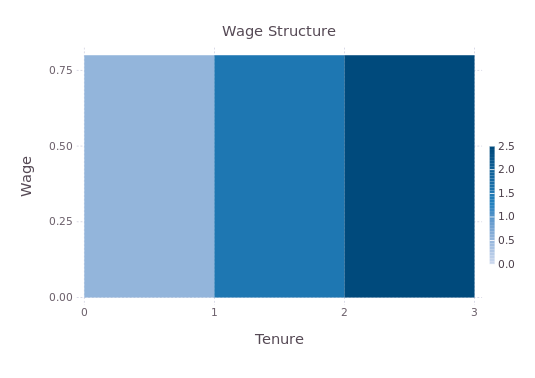

In [10]:
Disp && DisplayDP.Wages(W,colour=Colour)

### Production Function:

$F_0$ Production of Starting Worker  
$F_G$ Production of Last Tenure Worker  
$\hat{F}$ Peak Production  
$\hat{G}$ Tenure for Peaked Production

In [11]:
F_0=0.8;
F_G=1.0;
F̂=1.1;
Ĝ=2;

#### Error Checking:

In [12]:
LabourDP.ErrorCheck(1,Ĝ=Ĝ,G=G);

#### Create Production Structure

* [Production Function](Functions/Production.ipynb)
* [Production Display](Display/Production.ipynb)

In [13]:
F=LabourDP.Production(G,F_0,F_G,F̂,Ĝ);

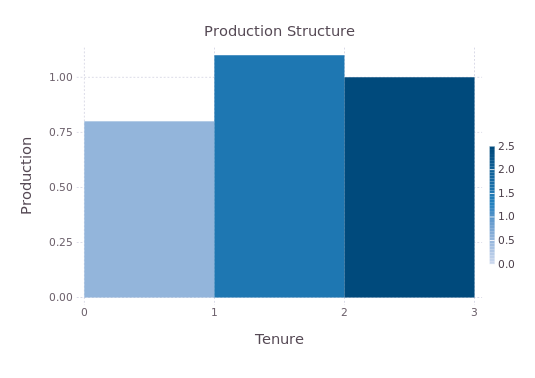

In [14]:
Disp && DisplayDP.Production(F,colour=Colour)

### Firing Cost Function

$\phi$ Percentage of Wage Paid as Firing Cost  
$S=\left\{ \begin{array}{l l}
1 & \text{Seniority}\\
0 & \text{No Seniority}
\end{array} \right.$ Increase of Firing Cost per year of tenure

In [15]:
ϕ=0.2;
S=true;

#### Error Checking:

In [16]:
LabourDP.ErrorCheck(1,ϕ=ϕ,S=S);

#### Create Firing Cost Structure

* [Firing Cost Function](Functions/Firing Cost.ipynb)
* [Firing Cost Display](Display/Firing Cost.ipynb)

In [17]:
FC=LabourDP.FiringCost(G,ϕ,S,W);

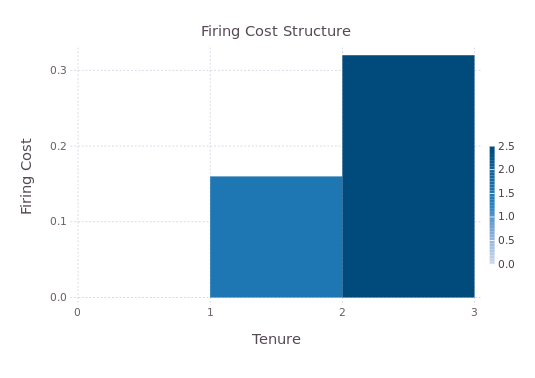

In [18]:
Disp && DisplayDP.FiringCost(FC,colour=Colour)

### Quit and Retirement Shock

$\delta$ Probability of a worker Retiring in the last tenure group  
$\gamma$ Probability of a worker Quiting in all but the last tenure group

In [19]:
δ=0.5;
γ=0.1;

Note: The Markov Process for Quit and Retirement is calculated later as it needs the Labour Portfolios.

#### Error Checking:

In [20]:
LabourDP.ErrorCheck(1,δ=δ,γ=γ);

### Demand Shock

$M_D$ Maximum Demand Shock $\max_D$  
$m_D$ Minimum Demand Shock $\min_D$  
$\rho$   Autocorrelation of Demand Shock  
$N_D$ Number of Demand Shocks  
  
$d$ Standard Deviation from the Mean to the Max/Min

In [21]:
M_D=10.;
m_D=5.;
ρ=0.8;
N_D=6;

d=2.;

#### Error Checking:

In [22]:
LabourDP.ErrorCheck(1,M_D=M_D,m_D=m_D,ρ=ρ,N_D=N_D,d=d);

#### Create Markov Shock

* [Demand Function](Functions/Demand Shock.ipynb)
* [Demand Display](Display/Demand Shock.ipynb)

In [23]:
DShock=LabourDP.Demand(M_D,m_D,ρ,N_D,d);

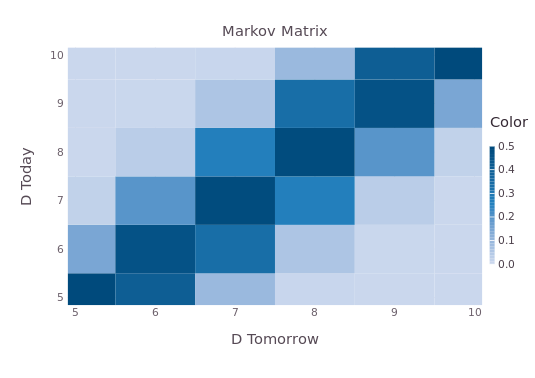

In [24]:
Disp && DisplayDP.Demand(DShock[1],DShock[2],colour=Colour)

## Labour Portfolios

### Labour Portfolio Function:

* [fPort Function](Functions/fPort Function.ipynb)
* [Function Display](Display/Display Function.ipynb)

In [25]:
fP=LabourDP.fPort(G);

In [26]:
Disp && IpDisp.Math(DisplayDP.FuncText(LabourDP.ePort(G),G))

PyObject <IPython.core.display.Math object>

### Create Labour Portfolio:

#### Max Workers:

$N_G$ Max Number of Workers in last Tenure Group

In [27]:
N_G=ceil(Int,M_D/F_G);

In [28]:
Disp && IpDisp.Math("N_G=ceil(max(D)/F_G)")

PyObject <IPython.core.display.Math object>

#### Labour Portfolio:

* [Labour Portfolio Function](Functions/Labour Portfolio.ipynb)
* [Labour Portfolio Display](Display/Labour Portfolio.ipynb)

In [29]:
L=LabourDP.LabourPortfolio(G,N,N_G,fP);

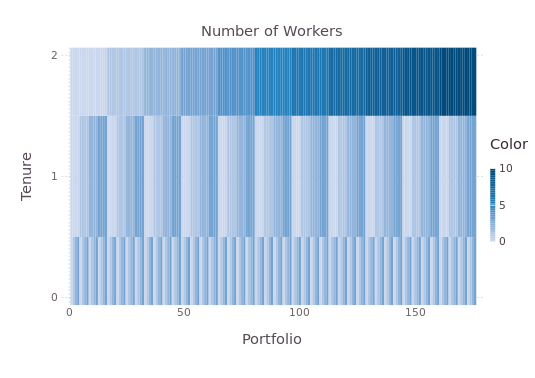

In [30]:
Sl=length(L);

Disp && DisplayDP.LabourPortfolio(L,colour=Colour)

### Shave Labour Portfolio:

#### Max Production:

$M_F$ is Maximum production a Labour Portfolio can have to be evaluated

In [31]:
M_F=M_D+maximum(F);

In [32]:
Disp && IpDisp.Math("M_F=M_D+max(F)")

PyObject <IPython.core.display.Math object>

#### Shave:

* [Shave Function](Functions/Shave.ipynb)
* [Shave Display](Display/Shave.ipynb)

In [33]:
L=LabourDP.Shave(L,F,M_F);

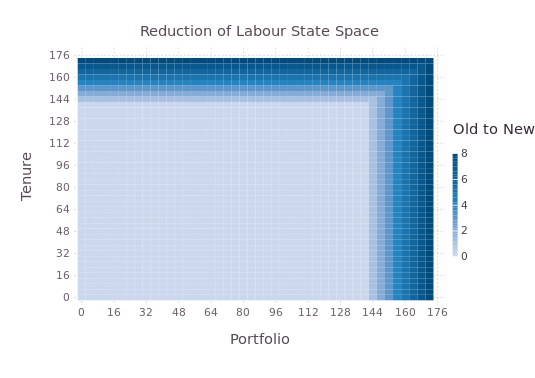

In [34]:
Disp && DisplayDP.Shave(Sl,length(L),colour=Colour)

### Find Feasible Portfolio:

#### Feasible Labour Choices:

* [Feasible Choices Function](Functions/Feasible Choices.ipynb)

In [35]:
Feas=LabourDP.FeasibleChoices(L);

#### Possible Labour Depreciation:

* [Feasible QnR Function](Functions/Feasible QnR.ipynb)

In [36]:
QnRFeas=LabourDP.FeasibleQnR(L);

## Quit and Retirement

### Transition Matrix

* [QnR Function](Functions/QnR.ipynb)
* [QnR Display](Display/QnR.ipynb)

In [37]:
QnR=LabourDP.QnRTransition(L,QnRFeas,δ,γ);

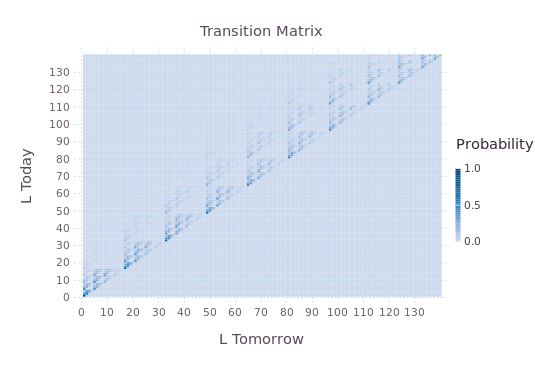

In [38]:
Disp && DisplayDP.QnR(QnR,colour=Colour)

## Profits

* [Profits Function](Functions/Profits.ipynb)
* [Profits Display](Display/Profits.ipynb)

In [39]:
P=LabourDP.Profits(L,DShock[1],W,F,FC,Feas);

Slider{Int64}([Input{Int64}] 3,"d",3,1:6)

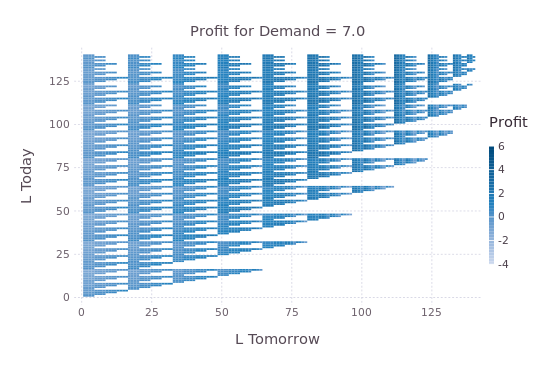

In [40]:
Disp && DisplayDP.Profits(P,Feas,DShock[1],colour=Colour)

## Value Function Iteration

* [VFI Function](Functions/VFI.ipynb)
* [Value Display](Display/Value Function.ipynb)

In [41]:
Solution=LabourDP.VFI(β,P,DShock[2],QnR,Feas[2]);

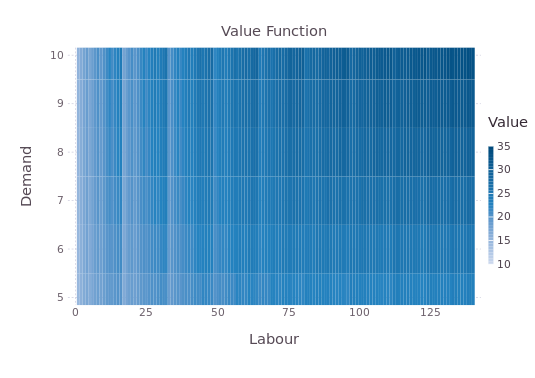

In [42]:
Disp && DisplayDP.Value(Solution[1],DShock[1],colour=Colour)